In [1]:
import numpy as np
from numpy import *
from sklearn.preprocessing import StandardScaler

In [67]:
# from diabetes.csv read data
def read_data():
    f = open('diabetes.csv', 'r')
    lines = f.readlines()
    data = []
    lines = lines[1:]  # skip header
    for line in lines:
        line = line.strip()
        parts = line.split('\t')
        parts = [float(x) for x in parts]
        data.append(parts)
    data = np.array(data)
    data_x = data[:, :-1]
    data_y = data[:, -1]
    return data_x, data_y

data_x, data_y = read_data()
print(data_x.shape, data_y.shape)

(442, 10) (442,)


In [68]:
from sklearn.model_selection import train_test_split
# Split the data
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(f"Original data range: min = {x_train.min():.1f}, max = {x_train.max():.1f}")

# Normalize the features to prevent overflow
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f"Scaled data range: min = {x_train_scaled.min():.2f}, max = {x_train_scaled.max():.2f}")

(353, 10) (353,)
Original data range: min = 1.0, max = 301.0
Scaled data range: min = -2.89, max = 4.20


In [86]:
def cost(x, y, theta):
    diff = x @ theta - y
    return (1 / (2 * len(y))) * diff.T @ diff

def gradientFun(x, y, theta):
    diff = x @ theta - y
    return (1 / len(y)) * x.T @ diff

def gradientDescent(initial_theta, learning_rate, threshold, max_iterations):
    theta = initial_theta
    cost_list = []
    for i in range(max_iterations):
        grad = gradientFun(x_train_scaled, y_train, theta)
        # print(grad)
        # print(theta)
        theta = theta - learning_rate * grad
        # print(theta)
        cost_value = cost(x_train_scaled, y_train, theta)
        cost_list.append(cost_value)
        if all(abs(grad) < threshold):
            break
            
    return theta, cost_list

In [87]:
theta, cost_list = gradientDescent(np.zeros(x_train_scaled.shape[1]), 0.01, 0.000001, 10000000)
print(f"Cost after {len(cost_list)} iterations: {cost_list[-1]:.2f}")
print(f"Final theta: {[round(x, 2) for x in theta]}")

Cost after 139263 iterations: 13251.74
Final theta: [np.float64(1.75), np.float64(-11.51), np.float64(25.61), np.float64(16.83), np.float64(-44.45), np.float64(24.64), np.float64(7.68), np.float64(13.14), np.float64(35.16), np.float64(2.35)]


In [62]:
# Evaluate the model
predictions = dot(x_test_scaled, theta)
mse = np.mean((predictions - y_test) ** 2)
print(f"Mean Squared Error on training set: {mse:.2f}")

Mean Squared Error on training set: 0.28


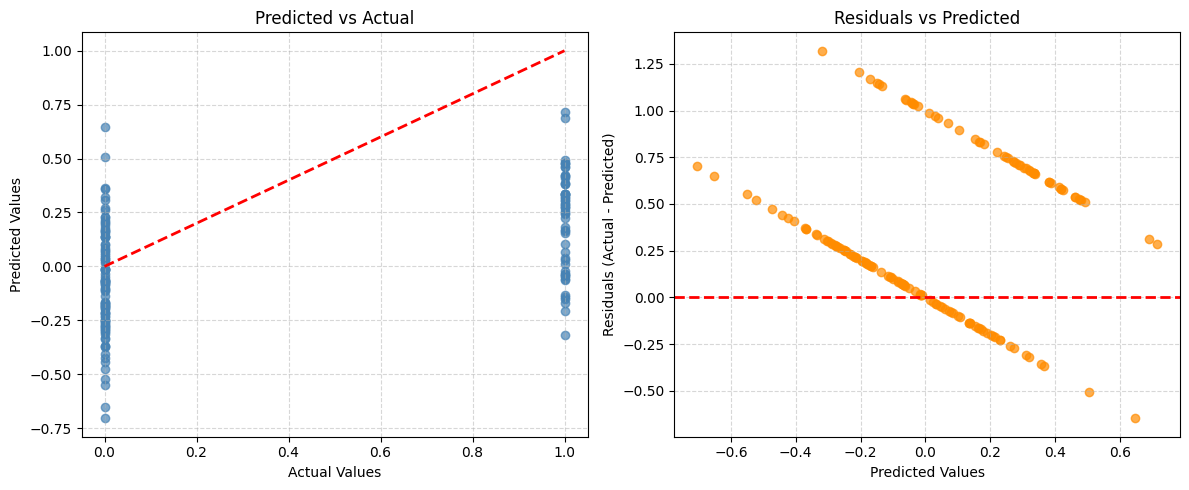

MSE: 0.28
RMSE: 0.53
MAE: 0.41
R²: -0.2229


In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你已经有了：
# y_test: 真实值 (numpy array)
# predictions: 模型预测值 (numpy array)

# 1. Predicted vs Actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.7, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Residuals Plot
residuals = y_test - predictions
plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals, alpha=0.7, color='darkorange')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 可选：打印一些误差指标
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")